# Iris Classification with K-Nearest Neighbors
This notebook is a simple exposition of supervised machine learning for classification using the K-Nearest Neighbors (KNN) algorithm. In KNN, an object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (where k is a positive integer, and typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. In this example, KNN will be used on the popular iris dataset to predict species based on geometric features.

#### Import libraries to be used
This analysis uses pandas for preprocessing, seaborn for visualization, and sklearn for model optimization and prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

#### Data Preprocessing 

The datasets from sklearn do not come in an array format. Some preprocessing is required.

In [2]:
iris_data = load_iris()
dataframe = pd.DataFrame(data = iris_data.data, columns = [i[:len(i)-5] for i in iris_data.feature_names])
dataframe['species'] = [iris_data.target_names[i] for i in iris_data.target] 
dataframe.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Exploratory Analysis
The purpose of this task is to predict species class (setosa,versicolor, or virginica) based on each flowers geometric features  and the mode of species classes of its k-nearest neighbors.The geometric features are sepal length, sepal width, petal length, petal width.

However, when visualizing the relationships of these features to each other in a pairplot, the overlap between virginica and versicolor can be seen. Thus the task is more difficult than it may have seemed. 

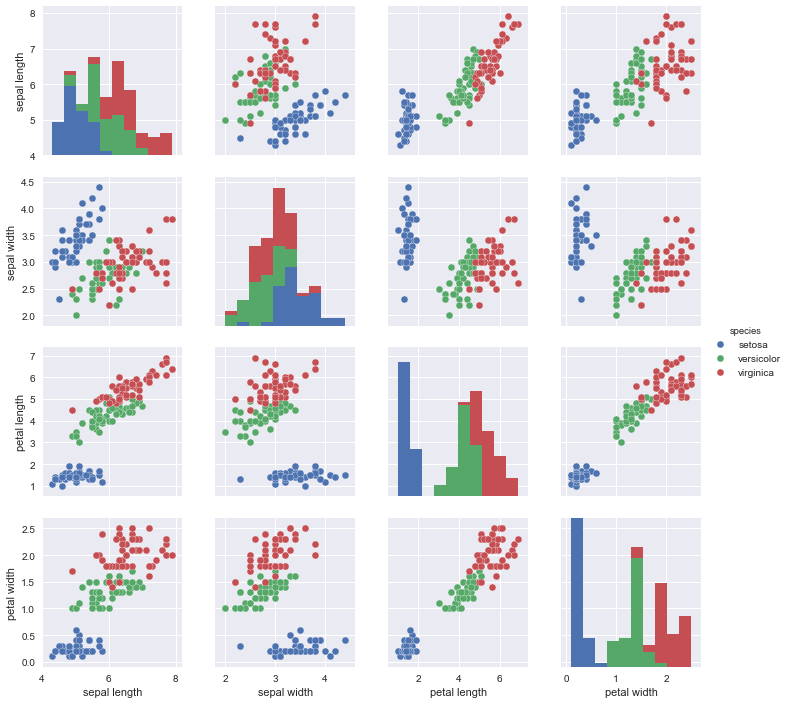

In [3]:
sns.pairplot(dataframe,hue='species')
plt.show()

#### Predictive Model Creation and Parameter Tuning

The data will first be randomly split the into train and test data sets. The model will be trained with GridSearchCV, which will use 5 fold cross validation and parameter tuning for number of neighbors, weights, and algorithm. The best performing parameters will be selected to when fitting the final model to be used for prediction.

In [4]:
#seperate data into features (used to make the prediction) and targets (the variable being predicted)

X = dataframe[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = dataframe['species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

# a classifier is created
knn_clf = KNeighborsClassifier()
params = {'n_neighbors':[1,2,3,5,7],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_clf = GridSearchCV(knn_clf,param_grid=params,cv=5)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [5]:
grid_clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [6]:
clf = grid_clf.best_estimator_

#### Model Performance Evalution
The mean accuracy of the cross validated model is ~94%. However, when the model is used make predictions on the previously unseen test data, it predicts with ~ 98% accuracy. Of the 50 predictions made, one value was predicted in error. The confusion matrix below reveals that it was a viginica that was mislabeled as a versicolor. The scatter plots below show which one was mislabled. 

In [7]:
print("Mean Cross Validated Accuracy: {}".format(grid_clf.best_score_))
print("Test Data Prediction Accuracy: {} ".format(clf.score(X_test,y_test)))

Mean Cross Validated Accuracy: 0.94
Test Data Prediction Accuracy: 0.98 


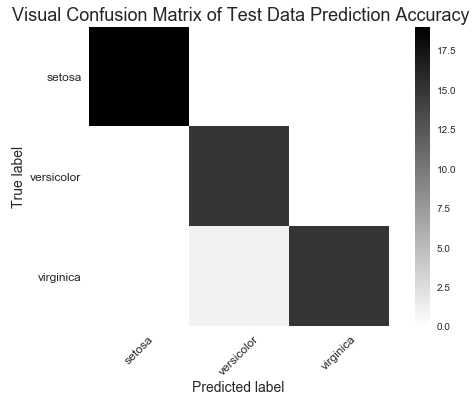

In [8]:
predicted_vals = clf.predict(X_test)
classes = iris_data.target_names
conf_mtx = confusion_matrix(y_test,predicted_vals)
plt.imshow(conf_mtx,interpolation='nearest',cmap=plt.cm.binary)
plt.title(' Visual Confusion Matrix of Test Data Prediction Accuracy',fontsize = 18)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45,fontsize = 12)
plt.yticks(tick_marks, classes,fontsize = 12)
plt.tight_layout()
plt.grid(False)
plt.ylabel('True label',fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

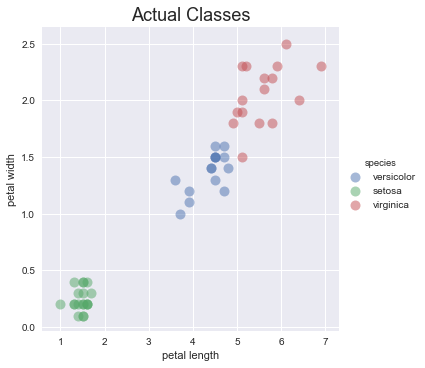

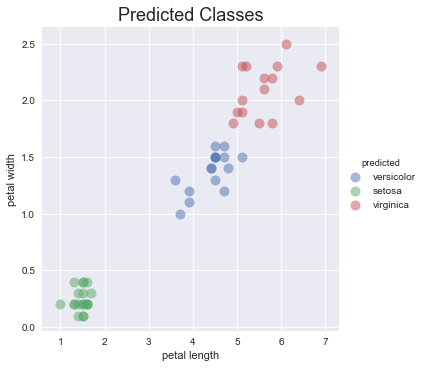

In [9]:
#prepare dataframe to use for plotting
pd.options.mode.chained_assignment = None 

plot_params ={'alpha':0.5,'s':100}

X_test['species'] = y_test
X_test['predicted'] = predicted_vals

#create plots
sns.lmplot(x ='petal length',
           y ='petal width',
           hue = 'species',
           data = X_test, 
           fit_reg=False,
           scatter_kws= plot_params)

plt.title('Actual Classes',fontsize = 18)

sns.lmplot(x ='petal length',
           y ='petal width',
           hue = 'predicted',
           data = X_test, 
           fit_reg=False,
           scatter_kws= plot_params)

plt.title('Predicted Classes',fontsize = 18)

plt.show()

#### Summary:
Given that parameter k is small (k=1), this model is likely fit to have high variance. High variance may suggest overfitting. However, in this case the model performed fairly well on the previosly unseen test data with an accuracy of ~98%, better than the mean crossvalidated score of 94% on the training data. This suggests that the model is not overfit, and could be a good predictor of species if given similar data. 